#Student Name: 
#ECE 595 Machine Learning II
#Project 4: Adversarial Machine Learning - Student Code

In [1]:
#Install Cleverhans (version Cleverhans 2.1.0 is most compatable with Python 2.x)
%tensorflow_version 1.x
#!pip install cleverhans==2.1.0


TensorFlow 1.x selected.


In [2]:
from keras.datasets import mnist
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense, BatchNormalization, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout, LSTM, Reshape
from keras import backend
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2
import os
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [ ]:
#Import necessary packages
import tensorflow.compat.v1 as tf; print(tf.__version__)
from keras.datasets import mnist
from keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM, InputLayer
from tensorflow.keras.models import load_model
from keras import backend
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2
import pandas as pd


1.15.2


#Part 1: Training a target classifier

In [3]:
# Load data MNIST data and normalize to [0, 1]
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = (data_train)/255.; print(tf.shape(data_train))
data_test = (data_test)/255; print(tf.shape(data_test))

#Reshape training and testing data into 784-dimensional vectors 
data_train = data_train.reshape(-1,28,28,1); print(tf.shape(data_train))
data_test = data_test.reshape(-1,28,28,1);   print(tf.shape(data_test))
# data_train = tf.reshape(data_train,[-1,28,28,1]); print(tf.shape(data_train))
# data_test = tf.reshape(data_test,[-1,28,28,1]); print(tf.shape(data_train))

#Convert integer labels for training and testing data into one-hot vectors 
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10);print(tf.shape(labels_train))
labels_test  = keras.utils.np_utils.to_categorical(labels_test , num_classes=10);print(tf.shape(labels_test))

num_samples=5000; n=28; num_channels=1; num_classes=10;

Tensor("Shape:0", shape=(3,), dtype=int32)
Tensor("Shape_1:0", shape=(3,), dtype=int32)
Tensor("Shape_2:0", shape=(4,), dtype=int32)
Tensor("Shape_3:0", shape=(4,), dtype=int32)
Tensor("Shape_4:0", shape=(2,), dtype=int32)
Tensor("Shape_5:0", shape=(2,), dtype=int32)


In [4]:

#Create classifier architecture, compile it, and train it
def CNN():
    model = Sequential()
    # x=(tf.keras.Input()
    # y=(tf.keras.layers.Dense(units=num_classes)      
    #model.add(InputLayer(n,n,num_channels))
    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Conv2D(256, kernel_size=(3,3), activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(10,activation='softmax'))
    #model= tf.keras.Model
    return model

#Create instance of CNN model graph
model = CNN()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [28]:


#Compile model using an appropriate loss and optimizer algorithm
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.train.AdamOptimizer(learning_rate=0.001), metrics=['accuracy'])

checkpoint_path = "/content/drive/MyDrive/ECE595DL/Project4/cp1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1)

#Train the model and assign training meta-data to a variable
model_mdata =  model.fit(data_train, labels_train, epochs=1,validation_data=(data_test, labels_test),batch_size=64, shuffle=True,callbacks=[cp_callback])#steps_per_epoch=1,)
hist_df = pd.DataFrame(model_mdata.history) 
CNN_dropout_hidden_file = 'CNN_mdata.csv'
with open(CNN_dropout_hidden_file, mode='w') as f:
    hist_df.to_csv(f)

#Print accuracy of model on testing set after training 
scores_dropout_hidden = model.evaluate(data_train, labels_train)
model.save("/content/drive/MyDrive/ECE595DL/Project4/mnist_classified_CNN3.h5")




Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 504s 8ms/step - loss: 0.1406 - accuracy: 0.9569 - val_loss: 0.0679 - val_accuracy: 0.9827

Epoch 00001: saving model to /content/drive/MyDrive/ECE595DL/Project4/cp1.ckpt


/tensorflow-1.15.2/python3.7/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


NameError: ignored

In [29]:
scores_dropout_hidden = model.evaluate(data_train, labels_train)
model.save("/content/drive/MyDrive/ECE595DL/Project4/mnist_classified_CNN3.h5")

60000/60000 [==============================] - 105s 2ms/step


/tensorflow-1.15.2/python3.7/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [ ]:


#Compile model using an appropriate loss and optimizer algorithm
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.train.AdamOptimizer(learning_rate=0.001), metrics=['accuracy'])

checkpoint_path = "/content/drive/MyDrive/ECE595DL/Project4/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

#Train the model and assign training meta-data to a variable
model_mdata =  model.fit(data_train, labels_train, epochs=30,validation_data=(data_test, labels_test),batch_size=64, shuffle=True,callbacks=[cp_callback])#steps_per_epoch=1,)
hist_df = pd.DataFrame(model_mdata.history) 
CNN_dropout_hidden_file = 'CNN_mdata.csv'
with open(CNN_dropout_hidden_file, mode='w') as f:
    hist_df.to_csv(f)

#Print accuracy of model on testing set after training 
scores_dropout_hidden = model.evaluate(data_train, labels_train)
model.save("mnist_classified_CNN2.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 374s 6ms/step - loss: 0.1468 - accuracy: 0.9551 - val_loss: 0.0489 - val_accuracy: 0.9843

Epoch 00001: saving model to /content/drive/MyDrive/ECE595DL/Project4/cp.ckpt
Epoch 2/30
60000/60000 [==============================] - 372s 6ms/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0370 - val_accuracy: 0.9870

Epoch 00002: saving model to /content/drive/MyDrive/ECE595DL/Project4/cp.ckpt
Epoch 3/30
60000/60000 [==============================] - 372s 6ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0377 - val_accuracy: 0.9876

Epoch 00003: saving model to /content/drive/MyDrive/ECE595DL/Project4/cp.ckpt
Epoch 4/30
60000/60000 [==============================] - 370s 6ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0280 - val_accuracy: 0.9905

Epoch 00004: saving model to /content/drive/MyDrive/ECE595DL/Project4/cp.ckpt
Epoch 5/30
60000/60000 [==================

/tensorflow-1.15.2/python3.7/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [ ]:
model.save("/content/drive/MyDrive/ECE595DL/Project4/mnist_classified_CNN2.json")
model.save("/content/drive/MyDrive/ECE595DL/Project4/mnist_classified_CNN2.h5")


/tensorflow-1.15.2/python3.7/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
dropout_30 (Dropout)         (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 128)       295040    
_________________________________________________________________
dropout_31 (Dropout)         (None, 11, 11, 128)       0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3200)            

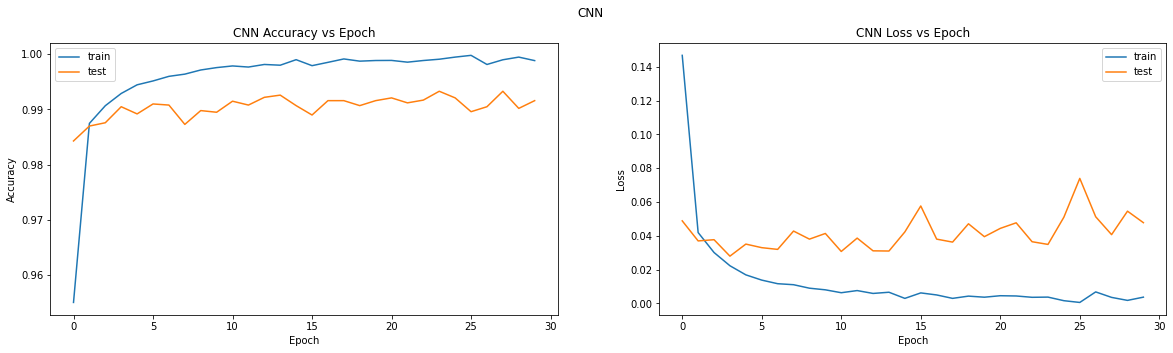

    Unnamed: 0  val_loss  val_accuracy      loss  accuracy
0            0  0.048873        0.9843  0.146790  0.955067
1            1  0.037004        0.9870  0.041949  0.987483
2            2  0.037723        0.9876  0.030144  0.990683
3            3  0.027995        0.9905  0.022312  0.992900
4            4  0.035126        0.9892  0.016928  0.994467
5            5  0.033014        0.9910  0.013818  0.995167
6            6  0.031990        0.9908  0.011691  0.996000
7            7  0.042835        0.9873  0.011095  0.996400
8            8  0.038058        0.9898  0.009035  0.997150
9            9  0.041412        0.9895  0.008071  0.997583
10          10  0.030767        0.9915  0.006352  0.997883
11          11  0.038666        0.9908  0.007626  0.997683
12          12  0.031135        0.9922  0.005933  0.998150
13          13  0.031024        0.9926  0.006639  0.998017
14          14  0.042329        0.9907  0.003002  0.999017
15          15  0.057682        0.9890  0.006247  0.9979

In [ ]:
def plotting(history,title):
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.plot(history.accuracy)
  plt.plot(history.val_accuracy)
  plt.title('CNN Accuracy vs Epoch'); plt.ylabel('Accuracy'); plt.xlabel('Epoch')
  plt.legend(['train','test']); 
  plt.subplot(122);
  plt.plot(history.loss)
  plt.plot(history.val_loss)
  plt.title('CNN Loss vs Epoch'); plt.ylabel('Loss'); plt.xlabel('Epoch')
  plt.legend(['train','test']); plt.suptitle(title); plt.show();
#Plot loss vs epoch
CNN_file = 'CNN_mdata.csv'
history=pd.read_csv(CNN_file); 
plotting(history,'CNN')
print(history)

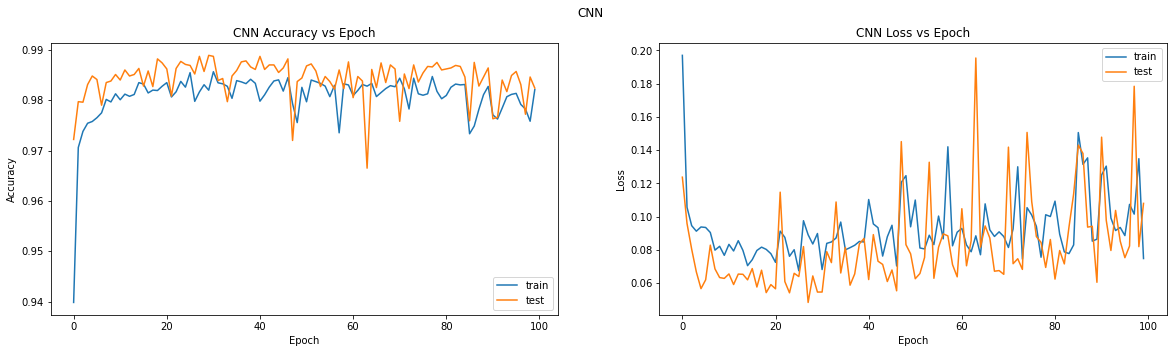

    Unnamed: 0      loss  accuracy  val_loss  val_accuracy
0            0  0.197056  0.939833  0.123725        0.9722
1            1  0.105596  0.970600  0.095858        0.9797
2            2  0.094559  0.973800  0.080390        0.9796
3            3  0.091231  0.975417  0.066722        0.9831
4            4  0.093768  0.975767  0.056649        0.9848
..         ...       ...       ...       ...           ...
95          95  0.088580  0.981350  0.075282        0.9857
96          96  0.107364  0.979150  0.082272        0.9831
97          97  0.101496  0.978233  0.178436        0.9772
98          98  0.134864  0.975817  0.081924        0.9846
99          99  0.074765  0.982083  0.107964        0.9824

[100 rows x 5 columns]


In [ ]:
def plotting(history,title):
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.plot(history.accuracy)
  plt.plot(history.val_accuracy)
  plt.title('CNN Accuracy vs Epoch'); plt.ylabel('Accuracy'); plt.xlabel('Epoch')
  plt.legend(['train','test']); 
  plt.subplot(122);
  plt.plot(history.loss)
  plt.plot(history.val_loss)
  plt.title('CNN Loss vs Epoch'); plt.ylabel('Loss'); plt.xlabel('Epoch')
  plt.legend(['train','test']); plt.suptitle(title); plt.show();
#Plot loss vs epoch
CNN_file = 'CNN_mdata.csv'
history=pd.read_csv(CNN_file); 
plotting(history,'CNN')
print(history)

In [ ]:
#Print accuracy of classifier on MNIST testing data
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Accuracy: 98.74%


In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:

# Edit the classifier name fed into KerasModel Wrapper with the name of the 
#!pip uninstall h5py
#!pip install h5py
checkpoint_path = "/content/drive/MyDrive/ECE595DL/Project4/cp2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model=CNN();#model.summary()

latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest)
# Create a new model instance

# Load the previously saved weights
#model.load_weights("/content/drive/MyDrive/ECE595DL/Project4/mnist_classified_CNN") #tf.saved_model.load(checkpoint_path)
#model = tf.keras.models.load_model('/content/drive/MyDrive/ECE595DL/Project4/cp.ckpt')
#model = tf.keras.models.load_model('/content/mnist_classified_CNN.json')
#model = tf.keras.models.load_model('/content/mnist_classified_CNN2.h5',compile=True)
#model.load_model('/content/drive/MyDrive/ECE595DL/Project4/cp.ckpt')

#model = keras.models.load_model('/content/mnist_classified_CNN.json')
#model = tf.keras.models.load_model('/content/mnist_classified_CNN.json')

# Check its architecture
#model.summary()
# load('mnist_classified_CNN.h5')
#Get TensorFlow Session to pass into Cleverhans modules
#sess = tf.compat.v1.keras.backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
#wrap = KerasModelWrapper(model)

None


#Part 2: The Fast Gradient Method (FGM)

In [ ]:
#Implementing the FGSM attack
backend.set_learning_phase(0)
#from cleverhans.attacks import FastGradientMethod
#FGM Instance on trained classifier from Part 1
#FILL THIS IN
fgm = FastGradientMethod(wrap, sess=sess)

#Attack parameters
#FILL THIS IN
fgm_params = { 'eps': 0.25, 'clip_min': 0.0, 'clip_max': 1.0}

#Generate adversarial data
#FILL THIS IN
fgm_data = fgm.generate_np(data_test, **fgm_params)

#Evaluate accuracy on target classifier 
#FILL THIS IN
# backend.set_learning_phase(0)
[test_loss_fgm, test_acc_fgm] = model.evaluate(fgm_data, labels_test, batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc_fgm*100))



Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#Implementing the FGSM attack

#FGM Instance on trained classifier from Part 1
#FILL THIS IN

#Attack parameters
#FILL THIS IN

#Generate adversarial data
#FILL THIS IN

#Evaluate accuracy on target classifier 
#FILL THIS IN


In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN

In [ ]:
#Implementing Detection via Autoencoders

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create and train the autoencoder using the mean squared error loss and adam optimizer
#FILL THIS IN

In [ ]:
#Using the autoencoder for detection and to determine a threshold 

# Create adversarial examples using FGSM on training data
#FILL THIS IN

# Obtain reconstruction errors on training set and determine a threshold 
#FILL THIS IN

# Convert error tensor into NumPy array 
# CHANGE NAME 'error' TO WHAT YOU CALLED IT ABOVE
error = error.eval(session=sess)

# Determine threshold (based on min in this case) and print it 
#FILL THIS IN

# Calculate error of adversarial testing set
#FILL THIS IN

# Determine how many examples are above threshold and consider them adversarial
# (true positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
#FILL THIS IN

# Print number of true positive samples
#FILL THIS IN  

# Determine false positives on benign testing set
#FILL THIS IN 


# Determine how many examples are above threshold and consider them adversarial
# (false positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
#FILL THIS IN 
    
# Print number of false positive samples
#FILL THIS IN   

#Part 3: Projected Gradient Descent

In [ ]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters
#FILL THIS IN

#Generate adversarial data
#FILL THIS IN

#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 

In [ ]:
#Implementing the adversarial training defense
#FILL THIS IN

In [ ]:
#Using the defense to evaluate the accuracy of the perturbed data
#FILL THIS IN 

#Part 4: Carlini and Wagner Attack

In [ ]:
#Implementing the CW attack

#CW Instance on trained classifier from Part 1
#FILL THIS IN


#Attack parameters
#FILL THIS IN


#Generate adversarial data
#FILL THIS IN


#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 

In [ ]:
#Implementing the dimensionality reduction (PCA) defense 

#Calculate PCA projection
pca = PCA(100)
pca.fit(data_train)
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

#Transform perturbed CW data using the subspace from the original training data
#FILL THIS IN 

# create model for PCA
def pca_model():
    model = Sequential()
    
    #FILL THIS IN 

    return model

#Create model graph, compile it, and train it using pca_train lables_train 
#FILL THIS IN 

In [ ]:
#Using the defense (and comparing to baseline accuracy)
#FILL THIS IN 

#Part 5: DeepFool 

In [ ]:
#Implementing the DeepFool attack

#DeepFool Instance on trained classifier from Part 1
#FILL THIS IN


#Attack parameters
#FILL THIS IN


#Generate adversarial data
#FILL THIS IN


#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN

In [ ]:
#Implementing the Denoising Autoencoder Defense

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create training data for DAE 
df_attack_data_train = deepfool.generate_np(data_train, **fgm_params)
data_total_train = np.concatenate([df_attack_data_train, data_train])

#Create and train DAE graph
#FILL THIS IN

In [ ]:
#Using the defense

#Use DAE to to remove adversarial perturbation 
#FILL THIS IN

#Evaluate accuracy of FGM samples after denoising 
#FILL THIS IN

In [ ]:
#Show ten samples of adversarial samples after denoising
#FILL THIS IN